# User Guide

In [1]:
import os
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from Modules.ShapeShadow import Sector
from Modules import Beamer, JAW, DXF
from Modules import Templates as Temp


## Load Data

Use the JAW tool to load J.A.Woollam data from *.txt file

In [2]:
# Load environment variables
load_dotenv()

DATA_PATH = os.getenv("DATA_PATH")
STAGE_FILE = os.getenv("STAGE_FILE")

if not any([os.path.exists(DATA_PATH), os.path.exists(STAGE_FILE)]):
    raise FileNotFoundError("File not found")


In [3]:
# Load the data
jaw = JAW.read_jaw_file(DATA_PATH)

# Pull x and y coordinates from data
x, y = jaw.x, jaw.y

## Define a MapPattern

The map pattern defines where on the sample measurements has been taken. It takes an x,y-component along with tranlational and rotational offsets.

In [4]:
# Offset are: x = 0cm, y = 2.0cm, thet
a = 4.1  # deg
map_pattern = Beamer.MapPattern(xy=np.asarray([x, y]), xy_offset=np.asarray([0, 2.5]), theta_offset=4.1)

## Define a Spot

A spot defines the geometry of the bream hitting the sample. Takes a bream diameter and its angle of incident.

In [5]:
# For spot we'll use spot size 0.3mm (remember to keep units consistent ie. )
spot = Beamer.Spot(beam_diameter=JAW.BEAM_SIZE_WITH_FOCUS_PROBES, angle_incident=65)

## Define a SpotCollection

A spot collection take a MapPattern and Spot object that holds all the geometric information related to a measurement on a sample.

In [6]:
# We'll use the MapPattern and Spot object created above.
sc = Beamer.SpotCollection(map_pattern, spot)

## Defining Sample

Following shapes are available:
- Circle
- Sector
- Ellipse
- Rectangle
- Square

In [7]:
# We'll use the Sector class to define a "pizza-slice" kinda shape
# radius: 2in (1in = 2.54cm), angular sweep: 90 deg
sample = Sector(radius=2*2.54, sweep_angle=90, **Temp.SAMPLE)

# Offset rotation: 225+4.1 deg + translation: x=0cm, y=2.5cm
sample.rotate(225 + 4.1).translate(x=0, y=2.8)

## Plotting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


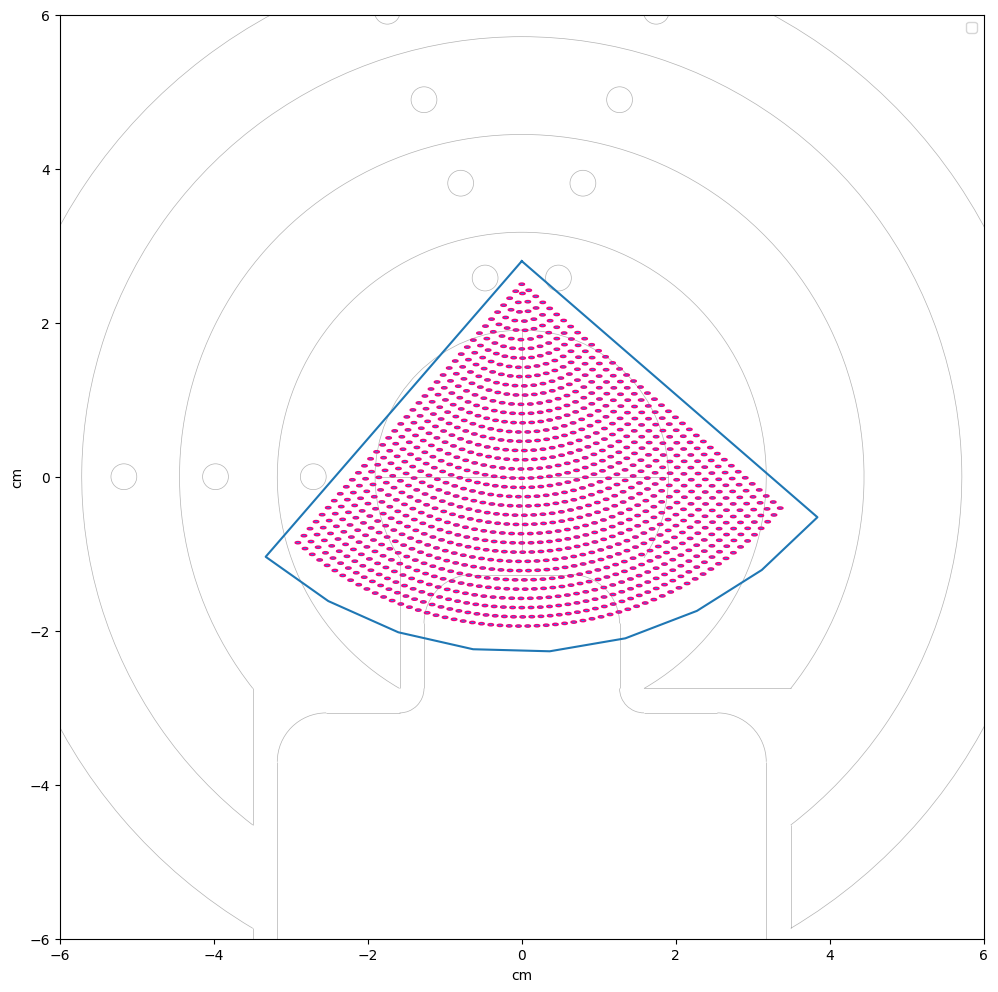

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot stage outline
DXF.plot(STAGE_FILE, ax, **Temp.STAGE)

# Plot sample outline
sample.plot(ax)

# Plot spots on sample
sc.plot(ax, as_ellipse=True, **Temp.SPOT)

ax.set_xlabel('cm')
ax.set_ylabel('cm')

ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))

ax.set_aspect("equal")

plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


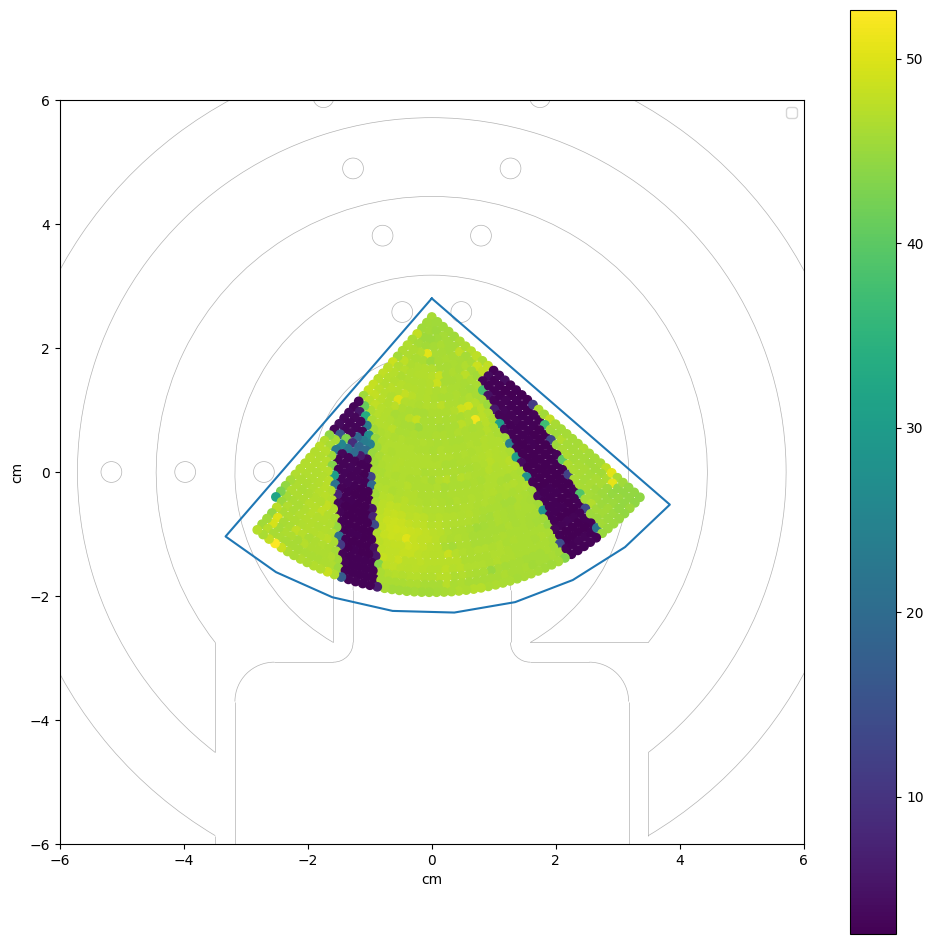

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot stage outline
DXF.plot(STAGE_FILE, ax, **Temp.STAGE)

# Plot sample outline
sample.plot(ax)

# Plot spots on sample
xy = sc.map_pattern.xy_instrument()
scatter = ax.scatter(xy[0, :], xy[1, :], c=jaw['thickness_nm'], zorder=10)


ax.set_xlabel('cm')
ax.set_ylabel('cm')

ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))

ax.set_aspect("equal")

plt.colorbar(scatter) 

plt.legend()
plt.show()